In [4]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns

In [58]:
df=pd.read_csv(r"D:\DATA SCIENCE {G L}\austo_automobile+(2)+(1).csv")

In [59]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


Data has been loaded correctly into the pandas dataframe

There are 1581 rows and 14 columns

There are missing values in 'Gender', 'Partner salary'

yes- there are discrepancies present in the data


In [14]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [21]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [27]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [12]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [13]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1528 non-null   object
 1   Profession       1581 non-null   object
 2   Marital_status   1581 non-null   object
 3   Education        1581 non-null   object
 4   Personal_loan    1581 non-null   object
 5   House_loan       1581 non-null   object
 6   Partner_working  1581 non-null   object
 7   Make             1581 non-null   object
dtypes: object(8)
memory usage: 98.9+ KB


In [14]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   No_of_Dependents  1581 non-null   int64  
 2   Salary            1581 non-null   int64  
 3   Partner_salary    1475 non-null   float64
 4   Total_salary      1581 non-null   int64  
 5   Price             1581 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 74.2 KB


In [37]:
df['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [113]:
df['Gender'] = df['Gender'].replace('Femal',df['Gender'].mode()[0])
df['Gender'] = df['Gender'].replace('Femle',df['Gender'].mode()[0])

In [114]:
df['Gender'].value_counts()

Male      1201
Female     327
Name: Gender, dtype: int64

In [28]:
df.isnull().sum()[df.isnull().sum()>0]

Gender             53
Partner_salary    106
dtype: int64

In [55]:
median1=df["Partner_salary"].median()

df["Partner_salary"].replace(np.nan,median1,inplace=True)

In [56]:
mode1=df["Gender"].mode().values[0]

df["Gender"]=df["Gender"].replace(np.nan,mode1)

In [57]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Salary')

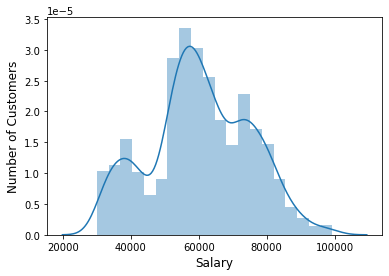

In [75]:
sns.distplot(df.Salary,bins=20) 
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("Salary",fontsize = 12)

In [ ]:
Total_salary

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Salary')

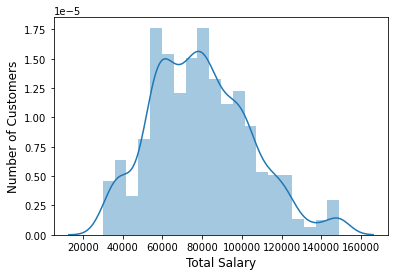

In [77]:
sns.distplot(df.Total_salary,bins=20) 
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("Total Salary",fontsize = 12)

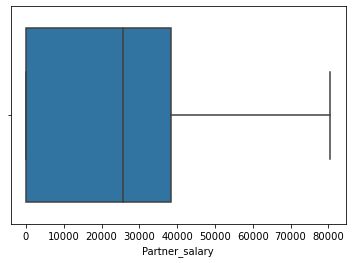

In [17]:
sns.boxplot(data=df, x='Partner_salary');

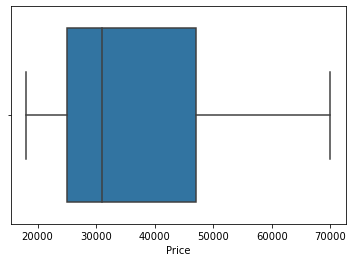

In [26]:
sns.boxplot(data=df, x='Price');

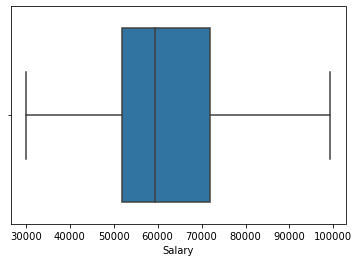

In [54]:
sns.boxplot(data=df, x='Salary');

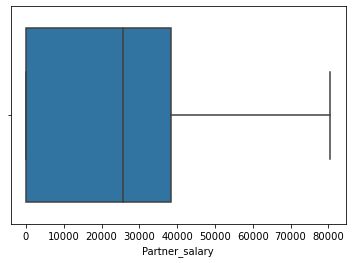

In [56]:
sns.boxplot(data=df, x='Partner_salary');

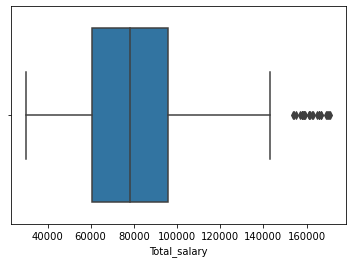

In [61]:
sns.boxplot(data=df, x='Total_salary');

In [62]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [63]:
lrTotal_salary,urTotal_salary=remove_outlier(df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']>urTotal_salary,urTotal_salary,df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']<lrTotal_salary,lrTotal_salary,df['Total_salary'])

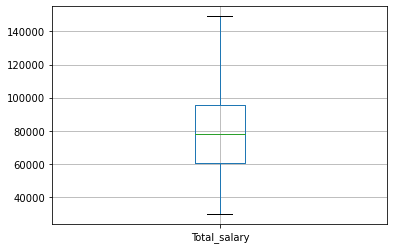

In [65]:
df.boxplot(column=['Total_salary'])
plt.show()

Text(0.5, 0, 'make')

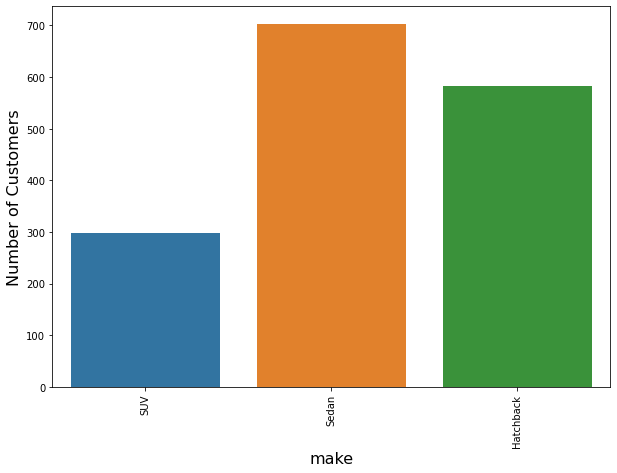

In [111]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Make')
plt.xticks(rotation=90)
plt.ylabel("Number of Customers",fontsize = 16)
plt.xlabel("make",fontsize = 16)

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'make')

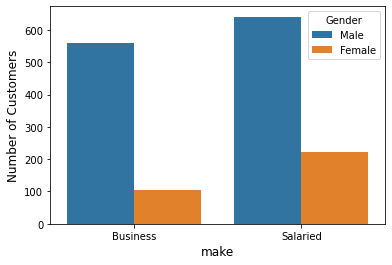

In [115]:
sns.countplot(df["Profession"],hue=df["Gender"]) 
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("make",fontsize = 12)

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'make')

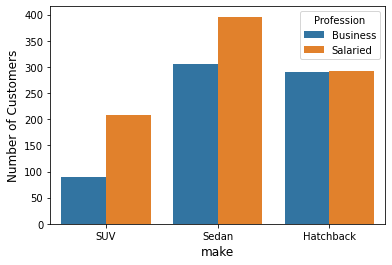

In [116]:
sns.countplot(df["Make"],hue=df["Profession"]);  
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("make",fontsize = 12)

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'make')

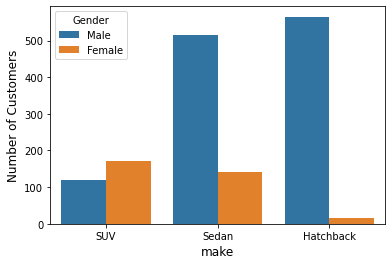

In [117]:
sns.countplot(df["Make"],hue=df["Gender"]);  
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("make",fontsize = 12)

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'make')

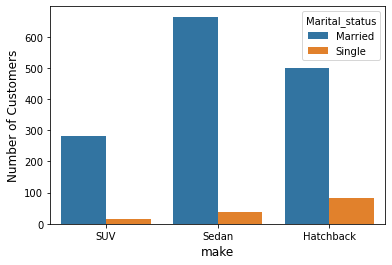

In [118]:
sns.countplot(df["Make"],hue=df["Marital_status"]); 
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("make",fontsize = 12)

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'make')

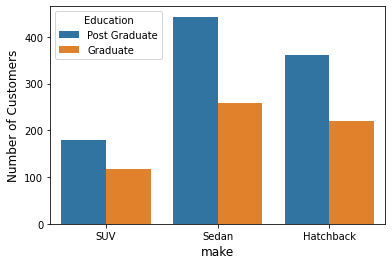

In [119]:
sns.countplot(df["Make"],hue=df["Education"]);
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("make",fontsize = 12)

<AxesSubplot:xlabel='Make', ylabel='Total_salary'>

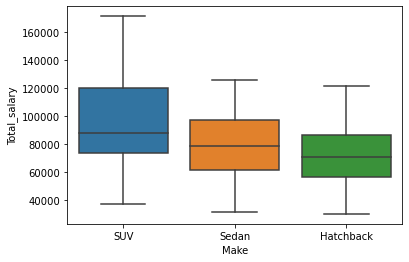

In [52]:
sns.boxplot(data=df, x='Make', y='Total_salary') 

<AxesSubplot:xlabel='Make', ylabel='Age'>

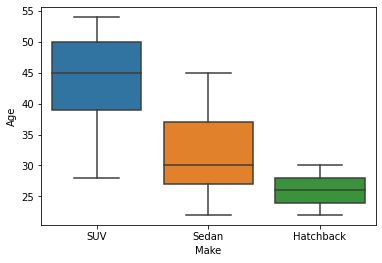

In [23]:
sns.boxplot(data=df, x='Make', y='Age') 

<AxesSubplot:xlabel='Make', ylabel='Price'>

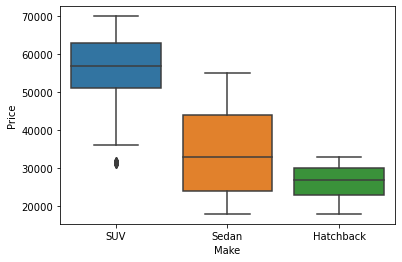

In [66]:
sns.boxplot(data=df, x='Make', y='Price') 

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal_loan', ylabel='count'>

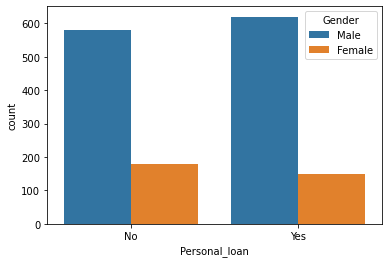

In [40]:
sns.countplot(df["Personal_loan"],hue=df["Gender"])  

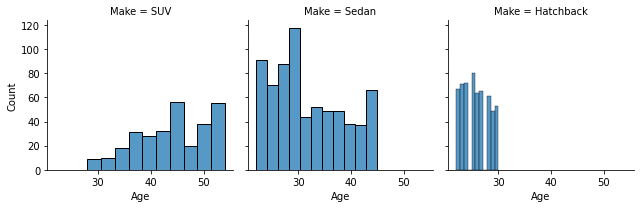

In [121]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "Age");


Text(0.5, 6.79999999999999, 'make')

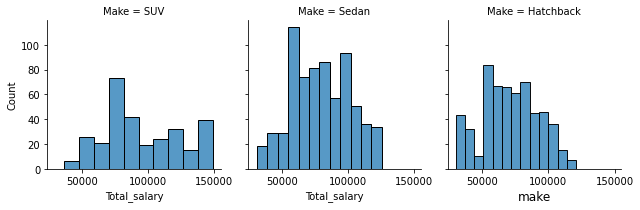

In [64]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "Total_salary");
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("make",fontsize = 12)


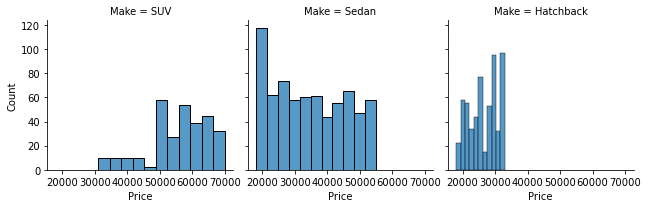

In [134]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "Price");



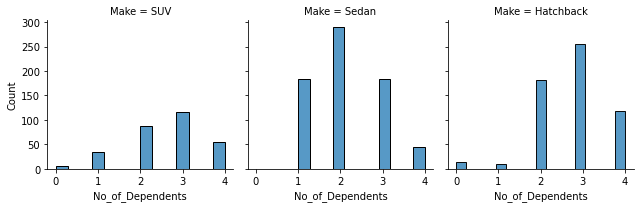

In [48]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "No_of_Dependents");

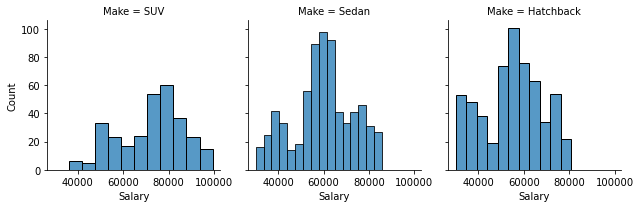

In [49]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "Salary");

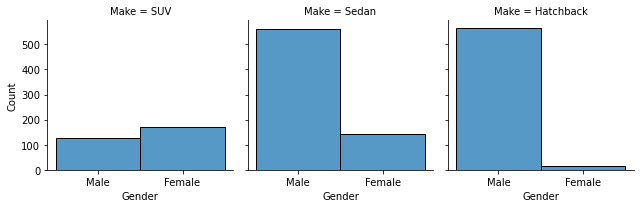

In [58]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "Gender");

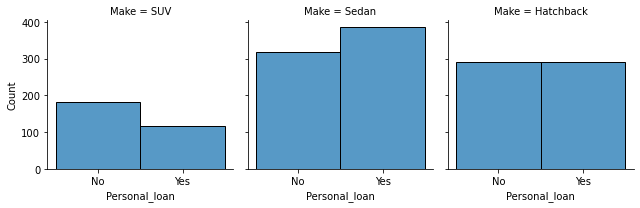

In [59]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "Personal_loan");

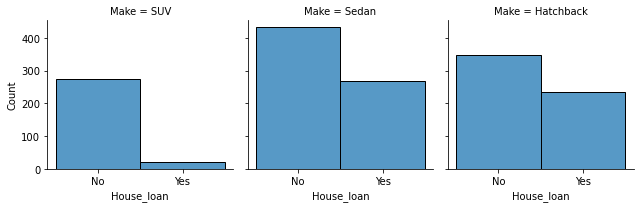

In [67]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "House_loan");

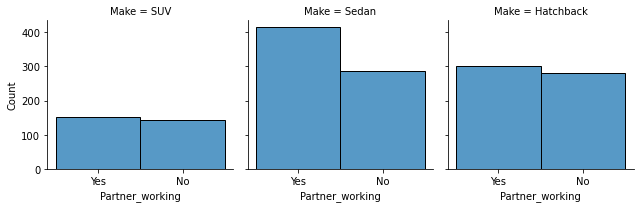

In [62]:
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "Partner_working");

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'make')

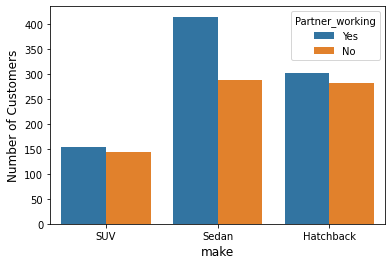

In [123]:
sns.countplot(df["Make"],hue=df["Partner_working"]); 
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("make",fontsize = 12)


In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
lrPrice,urPrice=remove_outlier(df['Price'])
df['Price']=np.where(df['Price']>urPrice,urPrice,df['Price'])
df['Price']=np.where(df['Price']<lrPrice,lrPrice,df['Price'])

In [34]:
df.shape

(1581, 14)

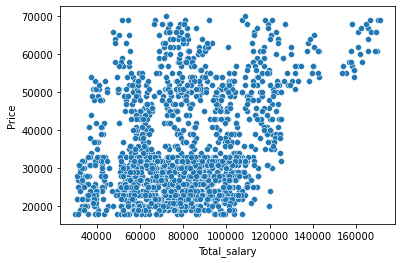

In [22]:
sns.scatterplot(data=df, x='Total_salary', y='Price',);

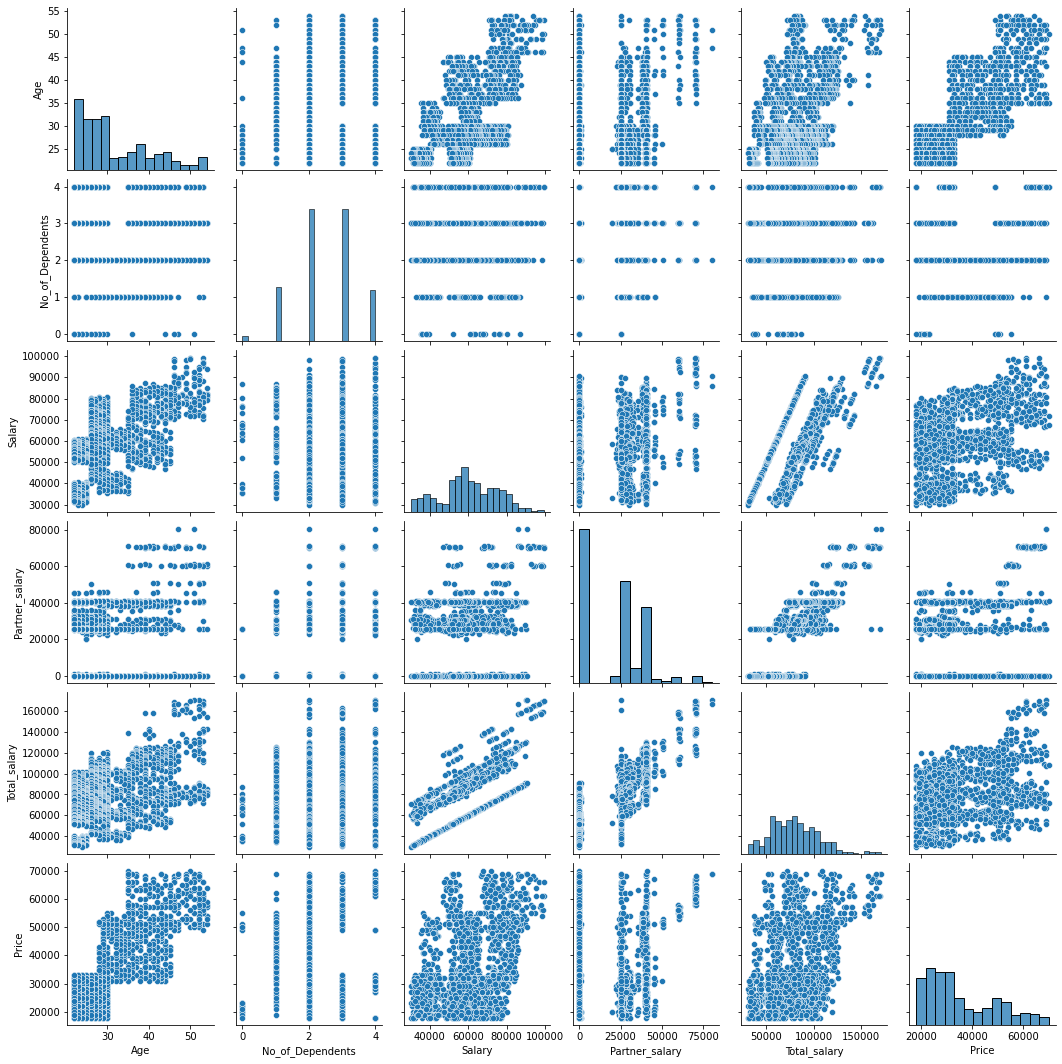

In [42]:
sns.pairplot(df)
plt.show()

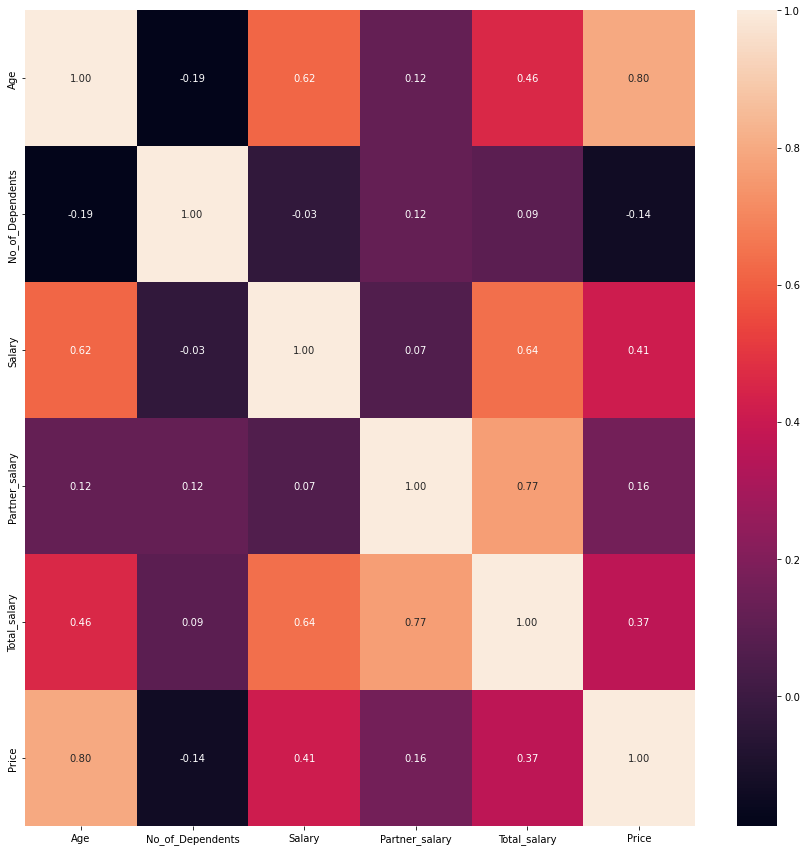

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


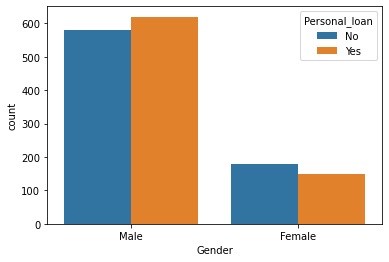

In [12]:
sns.countplot(df["Gender"],hue=df["Personal_loan"]); 

<AxesSubplot:xlabel='Partner_working', ylabel='Price'>

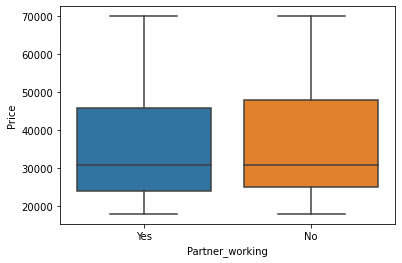

In [13]:
sns.boxplot(data=df, x='Partner_working', y='Price') 

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


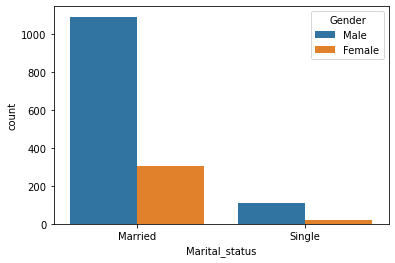

In [14]:
sns.countplot(df["Marital_status"],hue=df["Gender"]);  

In [5]:
df1=pd.read_csv("D:\DATA SCIENCE {G L}\SMDM\godigt_cc_data.csv")

In [6]:
df1.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Unnamed: 28
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,29-09-2019,B,0,1,1,...,0,0,0,0,0,T,"27,729",Self Employed,290000,NaN
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,30-10-2002,A,1,1,1,...,0,0,0,0,0,R,"2,80,854",0,950000,NaN
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,05-10-2013,C,0,0,0,...,1,0,0,0,0,R,"70,587",Student,210000,NaN
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,01-06-1999,E,0,1,1,...,0,0,1,0,0,T,"9,156",Self Employed,80000,NaN
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,13-06-2006,B,1,1,1,...,1,0,0,0,0,T,"38,108",Salaried,220000,NaN


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   userid                     8448 non-null   int64  
 1   card_no                    8448 non-null   object 
 2   card_bin_no                8448 non-null   int64  
 3   Issuer                     8448 non-null   object 
 4   card_type                  8448 non-null   object 
 5   card_source_date           8448 non-null   object 
 6   high_networth              8448 non-null   object 
 7   active_30                  8448 non-null   int64  
 8   active_60                  8448 non-null   int64  
 9   active_90                  8448 non-null   int64  
 10  cc_active30                8448 non-null   int64  
 11  cc_active60                8448 non-null   int64  
 12  cc_active90                8448 non-null   int64  
 13  hotlist_flag               8448 non-null   objec

In [147]:
df1.isnull().sum()

userid                          0
card_no                         0
card_bin_no                     0
Issuer                          0
card_type                       0
card_source_date                0
high_networth                   0
active_30                       0
active_60                       0
active_90                       0
cc_active30                     0
cc_active60                     0
cc_active90                     0
hotlist_flag                    0
widget_products                 0
engagement_products             0
 annual_income_at_source        0
other_bank_cc_holding           0
bank_vintage                    0
T+1_month_activity              0
T+2_month_activity              0
T+3_month_activity              0
T+6_month_activity              0
T+12_month_activity             0
Transactor_revolver            38
 avg_spends_l3m                 0
Occupation_at_source            0
cc_limit                        0
Unnamed: 28                  8448
dtype: int64

In [148]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 0


,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Unnamed: 28


In [149]:
df1_num = df1.select_dtypes(['float64','int64'])
df1_cat = df1.select_dtypes(['object'])

In [150]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   card_no                    8448 non-null   object
 1   Issuer                     8448 non-null   object
 2   card_type                  8448 non-null   object
 3   card_source_date           8448 non-null   object
 4   high_networth              8448 non-null   object
 5   hotlist_flag               8448 non-null   object
 6    annual_income_at_source   8448 non-null   object
 7   other_bank_cc_holding      8448 non-null   object
 8   Transactor_revolver        8410 non-null   object
 9    avg_spends_l3m            8448 non-null   object
 10  Occupation_at_source       8448 non-null   object
dtypes: object(11)
memory usage: 726.1+ KB


Data has been loaded correctly into the pandas dataframe

There are 8448 rows and 29 features

There are missing values in 'Transactor_revolver'.

'card_no','annual_income_at_source', avg_spends_l3m  are categorised as object type. However based on the values available in this feature/column, it should be numeric.

In [151]:
df1['card_no'].unique()

array(['4384 39XX XXXX XXXX', '4377 48XX XXXX XXXX',
       '4258 06XX XXXX XXXX', '5241 78XX XXXX XXXX',
       '4055 33XX XXXX XXXX', '4375 51XX XXXX XXXX',
       '4386 28XX XXXX XXXX', '4262 41XX XXXX XXXX', '37694 5XXXX XXXXX',
       '4477 47XX XXXX XXXX', '37691 6XXXX XXXXX'], dtype=object)

In [152]:
df1.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       ' annual_income_at_source ', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       ' avg_spends_l3m ', 'Occupation_at_source', 'cc_limit', 'Unnamed: 28'],
      dtype='object')

In [172]:
df1.other_bank_cc_holding

0       Y
1       Y
2       N
3       N
4       N
       ..
8443    N
8444    N
8445    Y
8446    N
8447    Y
Name: other_bank_cc_holding, Length: 8448, dtype: object

In [32]:
df1 = df1.rename(columns={' annual_income_at_source ': 'annual_income_at_source'})


In [33]:
df1["annual_income_at_source"] = [float(str(i).replace(",", "")) for i in df1["annual_income_at_source"]]

In [34]:
df1.annual_income_at_source

0       1552111.0
1       4833871.0
2       1345429.0
3        880560.0
4       1808582.0
          ...    
8443    3617288.0
8444    3661676.0
8445    1274059.0
8446    1271148.0
8447    1329756.0
Name: annual_income_at_source, Length: 8448, dtype: float64

In [35]:
df1['annual_income_at_source'] = df1['annual_income_at_source'].round(0).astype('int')

In [36]:
df1.annual_income_at_source

0       1552111
1       4833871
2       1345429
3        880560
4       1808582
         ...   
8443    3617288
8444    3661676
8445    1274059
8446    1271148
8447    1329756
Name: annual_income_at_source, Length: 8448, dtype: int32

In [37]:
df1 = df1.rename(columns={' avg_spends_l3m ': 'avg_spends_l3m'})

In [38]:
df1["avg_spends_l3m"] = [(str(i).replace(",", "")) for i in df1["avg_spends_l3m"]]

In [39]:
df1.avg_spends_l3m

0            27729
1       139574.375
2            70587
3             9156
4            38108
           ...    
8443        108713
8444         42369
8445          8459
8446         57100
8447         45244
Name: avg_spends_l3m, Length: 8448, dtype: object

In [42]:
df1['avg_spends_l3m'].dtypes

dtype('float64')

In [43]:
df1.avg_spends_l3m

0        27729.000
1       139574.375
2        70587.000
3         9156.000
4        38108.000
           ...    
8443    108713.000
8444     42369.000
8445      8459.000
8446     57100.000
8447     45244.000
Name: avg_spends_l3m, Length: 8448, dtype: float64

In [47]:
df1['avg_spends_l3m'] = df1['avg_spends_l3m'].round(0).astype('int')

In [48]:
df1.avg_spends_l3m

0        27729
1       139574
2        70587
3         9156
4        38108
         ...  
8443    108713
8444     42369
8445      8459
8446     57100
8447     45244
Name: avg_spends_l3m, Length: 8448, dtype: int32

In [108]:
mode1=df1["Transactor_revolver"].mode().values[0]

In [109]:
mode1=df1["Transactor_revolver"].mode().values[0]
df1["Transactor_revolver"]=df1["Transactor_revolver"].replace(np.nan,mode1)

In [110]:
df1.isnull().sum()

userid                        0
card_no                       0
card_bin_no                   0
Issuer                        0
card_type                     0
card_source_date              0
high_networth                 0
active_30                     0
active_60                     0
active_90                     0
cc_active30                   0
cc_active60                   0
cc_active90                   0
hotlist_flag                  0
widget_products               0
engagement_products           0
annual_income_at_source       0
other_bank_cc_holding         0
bank_vintage                  0
T+1_month_activity            0
T+2_month_activity            0
T+3_month_activity            0
T+6_month_activity            0
T+12_month_activity           0
Transactor_revolver           0
avg_spends_l3m                0
Occupation_at_source          0
cc_limit                      0
Unnamed: 28                8448
dtype: int64

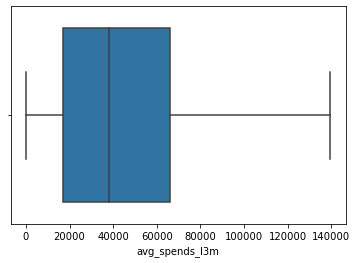

In [44]:
sns.boxplot(data=df1, x='avg_spends_l3m');

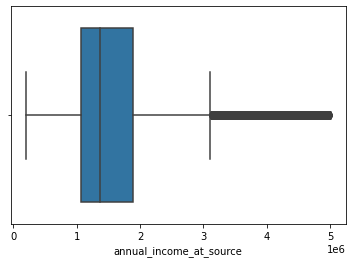

In [117]:
sns.boxplot(data=df1, x='annual_income_at_source');

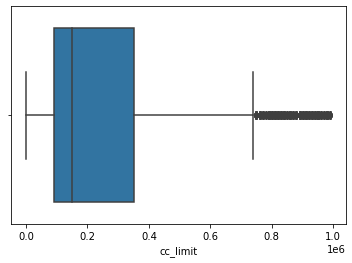

In [8]:
sns.boxplot(data=df1, x='cc_limit');

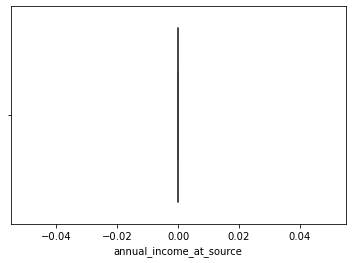

In [220]:
sns.boxplot(data=df1, x='annual_income_at_source');

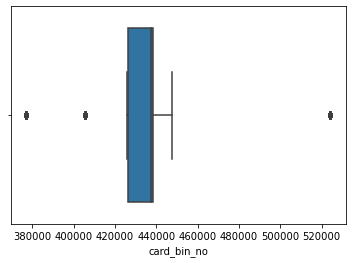

In [222]:
sns.boxplot(data=df1, x='card_bin_no');

outlier treatment

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [28]:
lrcc_limit,urcc_limit=remove_outlier(df1['cc_limit'])
df1['cc_limit']=np.where(df1['cc_limit']>urcc_limit,urcc_limit,df1['cc_limit'])
df1['cc_limit']=np.where(df1['cc_limit']<lrcc_limit,lrcc_limit,df1['cc_limit'])




lrcard_bin_no,urcard_bin_no=remove_outlier(df1['card_bin_no'])
df1['card_bin_no']=np.where(df1['card_bin_no']>urcard_bin_no,urcard_bin_no,df1['card_bin_no'])
df1['card_bin_no']=np.where(df1['card_bin_no']<lrcard_bin_no,lrcard_bin_no,df1['card_bin_no'])





In [118]:
lrannual_income_at_source,urannual_income_at_source=remove_outlier(df1['annual_income_at_source'])
df1['annual_income_at_source']=np.where(df1['annual_income_at_source']>urannual_income_at_source,urannual_income_at_source,df1['annual_income_at_source'])
df1['annual_income_at_source']=np.where(df1['annual_income_at_source']<lrannual_income_at_source,lrannual_income_at_source,df1['annual_income_at_source'])

In [109]:
df1.shape

(8448, 29)

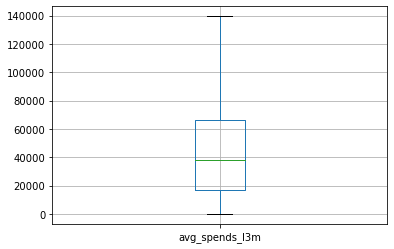

In [51]:
df1.boxplot(column=['avg_spends_l3m'])
plt.show()

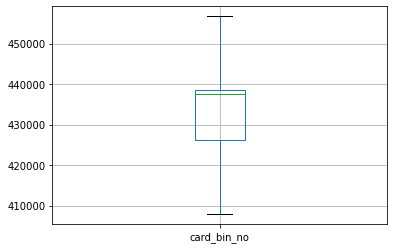

In [114]:
df1.boxplot(column=['card_bin_no'])
plt.show()

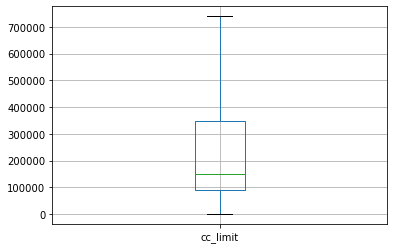

In [115]:
df1.boxplot(column=['cc_limit'])
plt.show()

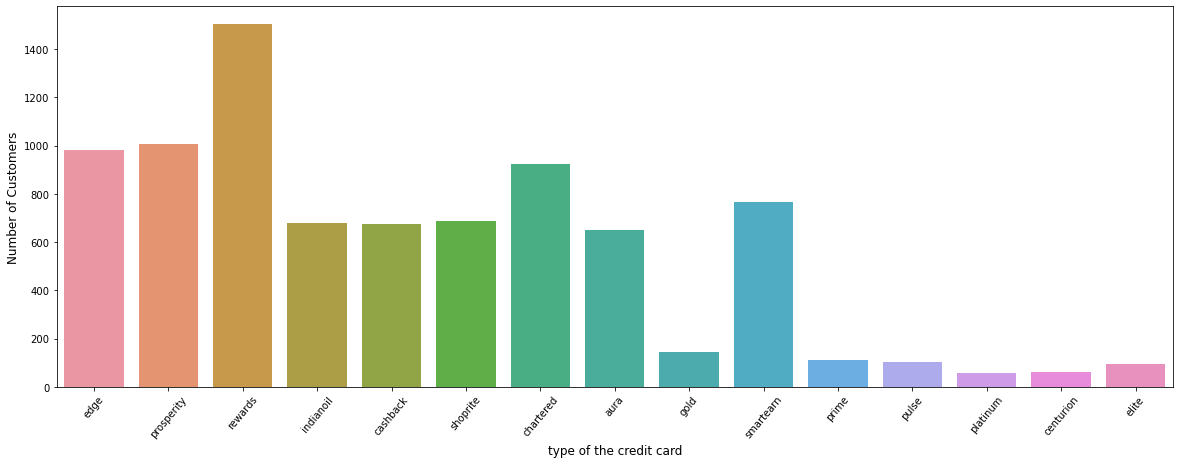

In [138]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()


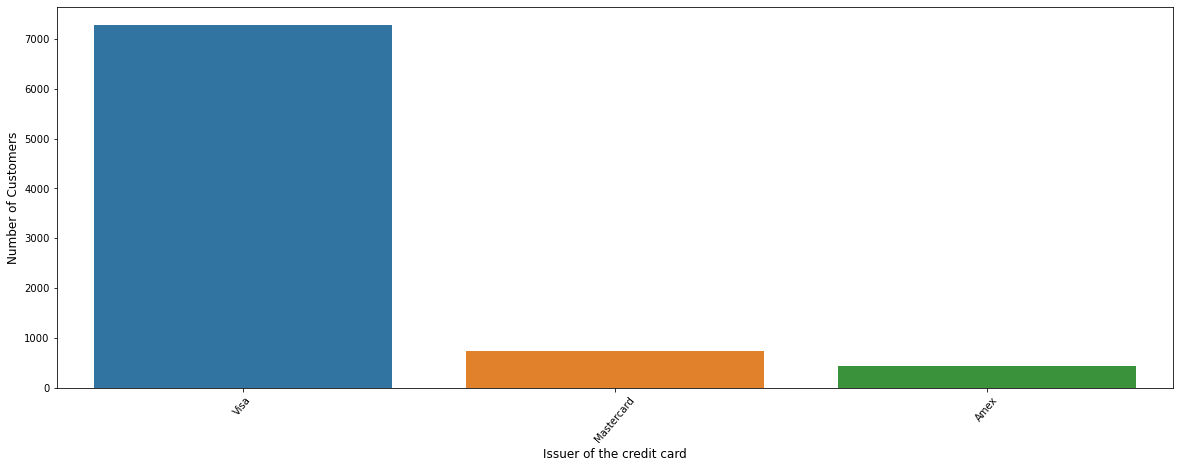

In [7]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='Issuer')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("Issuer of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()


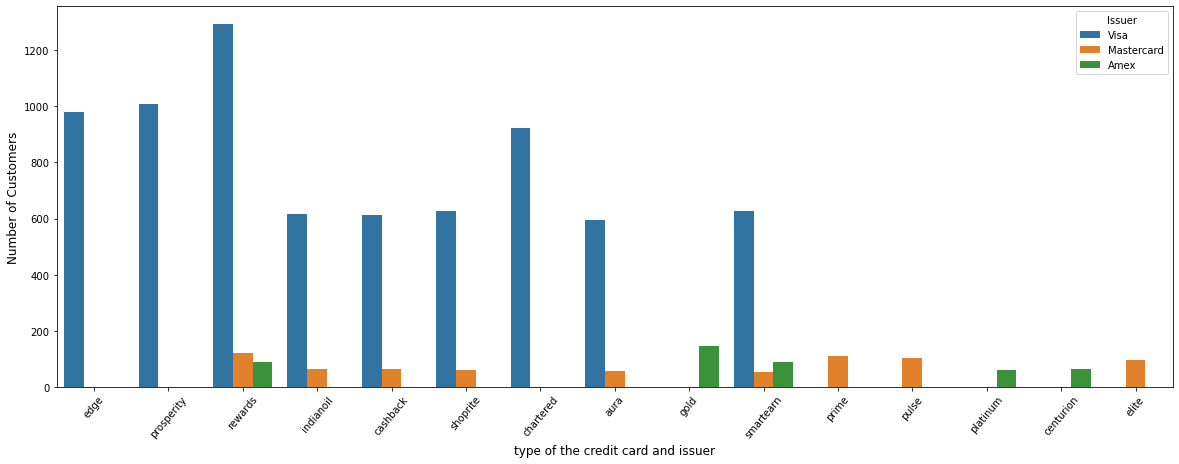

In [10]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='Issuer')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card and issuer",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

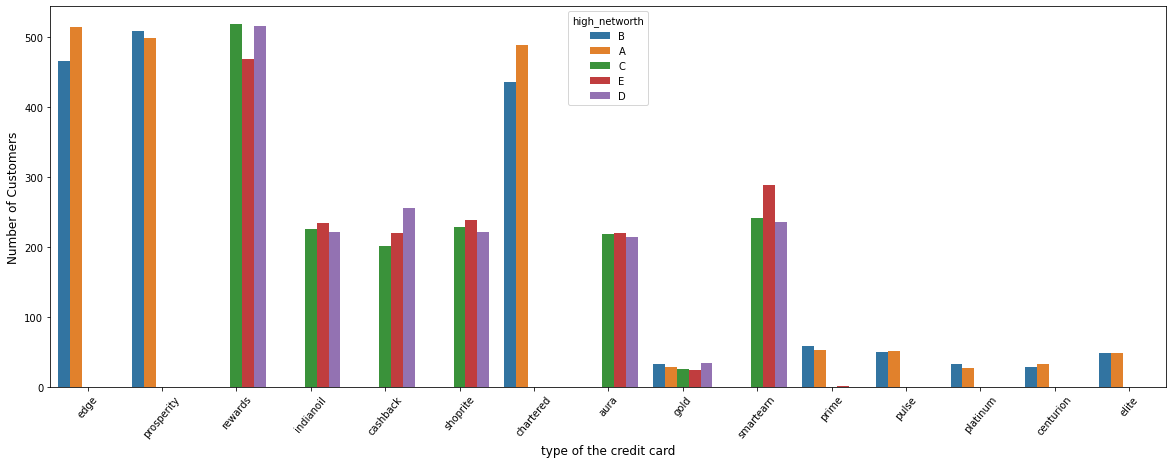

In [9]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='high_networth')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

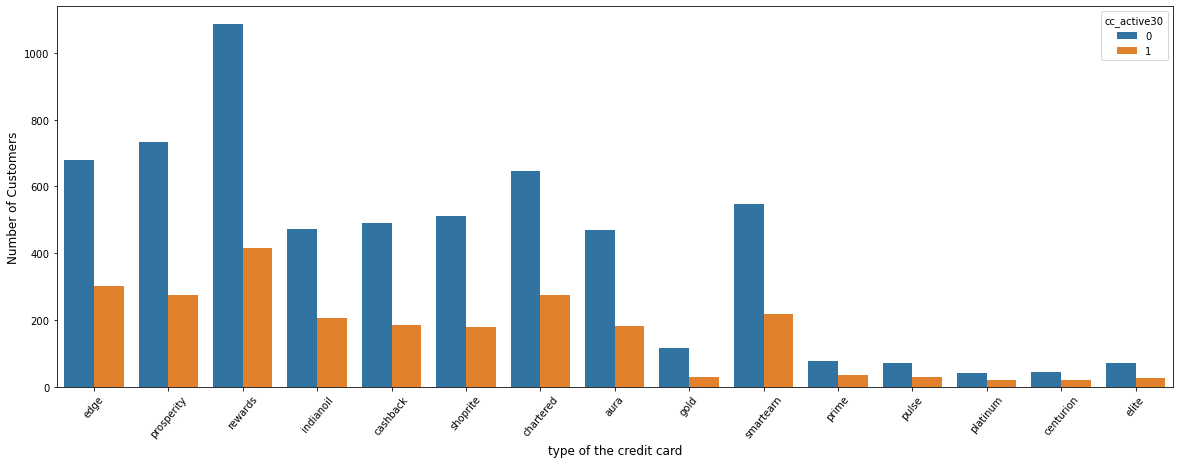

In [141]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='cc_active30')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

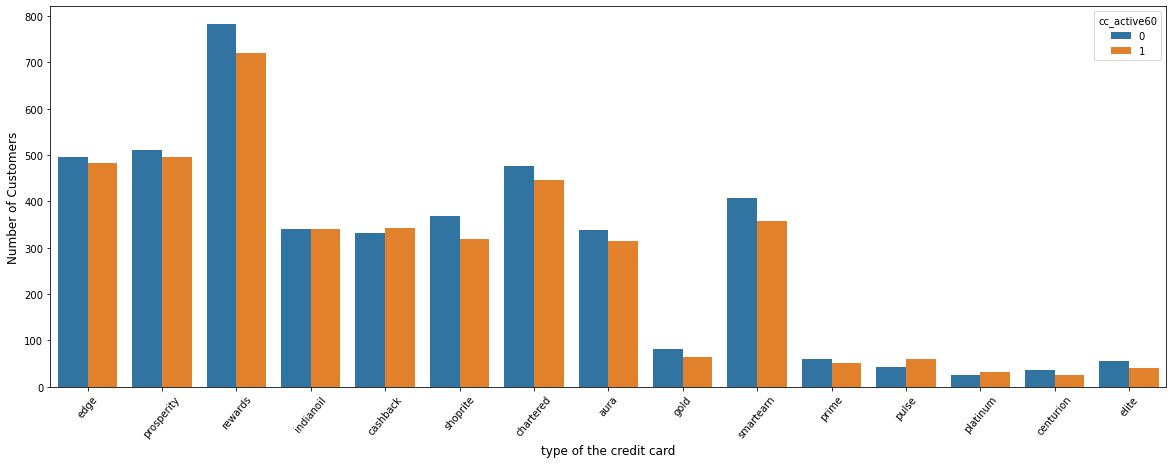

In [142]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='cc_active60')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

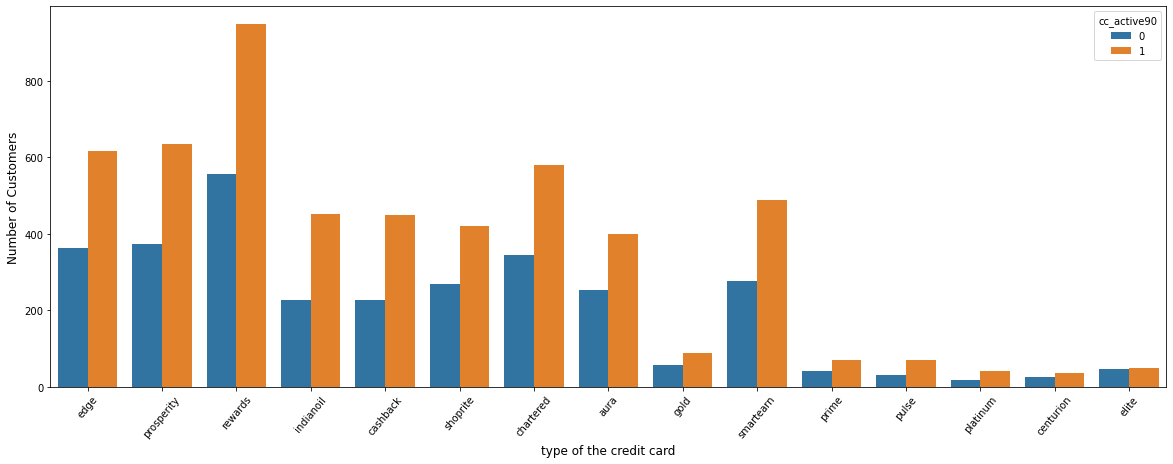

In [143]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='cc_active90')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

<Figure size 14400x50400 with 0 Axes>

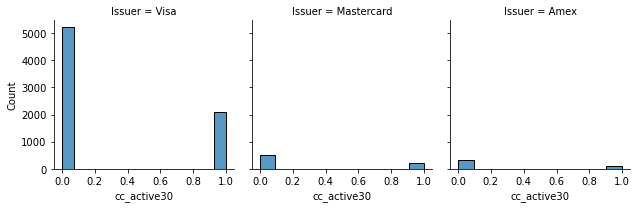

In [98]:
plt.figure(figsize=(200,700))
g = sns.FacetGrid(df1, col="Issuer")
g.map(sns.histplot, "cc_active30");
plt.show()

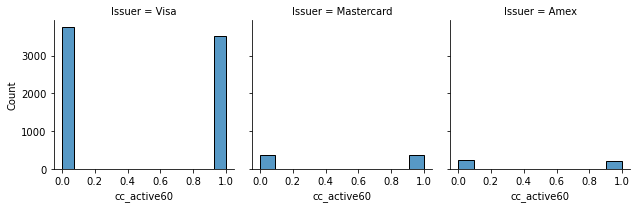

In [102]:

g = sns.FacetGrid(df1, col="Issuer")
g.map(sns.histplot, "cc_active60");


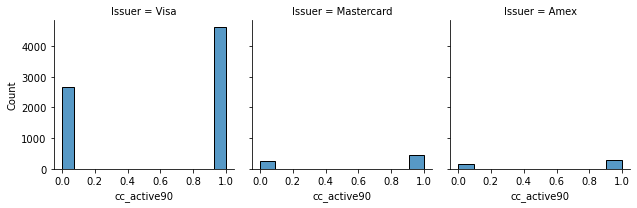

In [103]:
g = sns.FacetGrid(df1, col="Issuer")
g.map(sns.histplot, "cc_active90");

<Figure size 14400x50400 with 0 Axes>

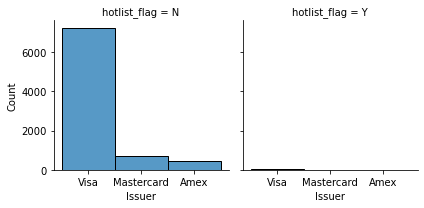

In [109]:
plt.figure(figsize=(200,700))
g = sns.FacetGrid(df1, col="hotlist_flag")
g.map(sns.histplot, "Issuer",);
plt.show()

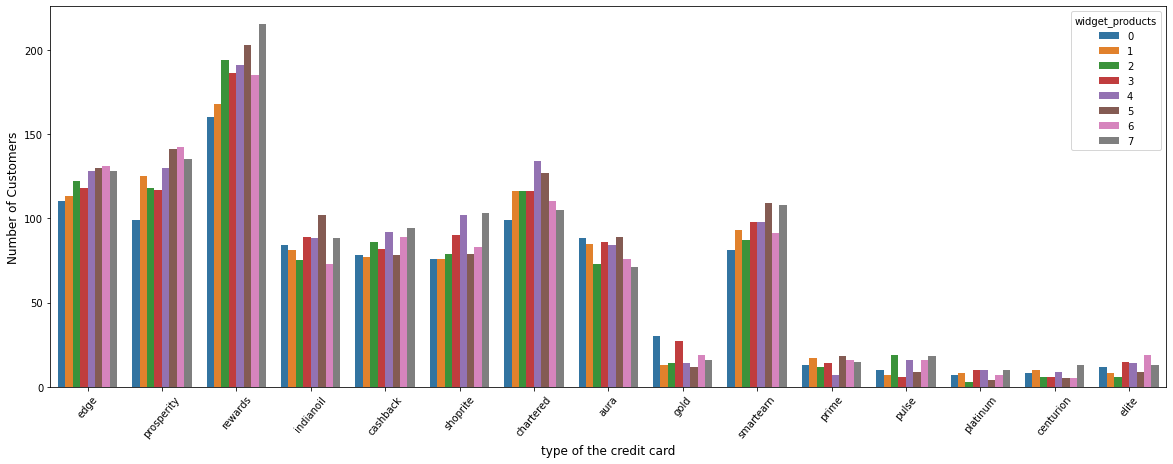

In [12]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='widget_products')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

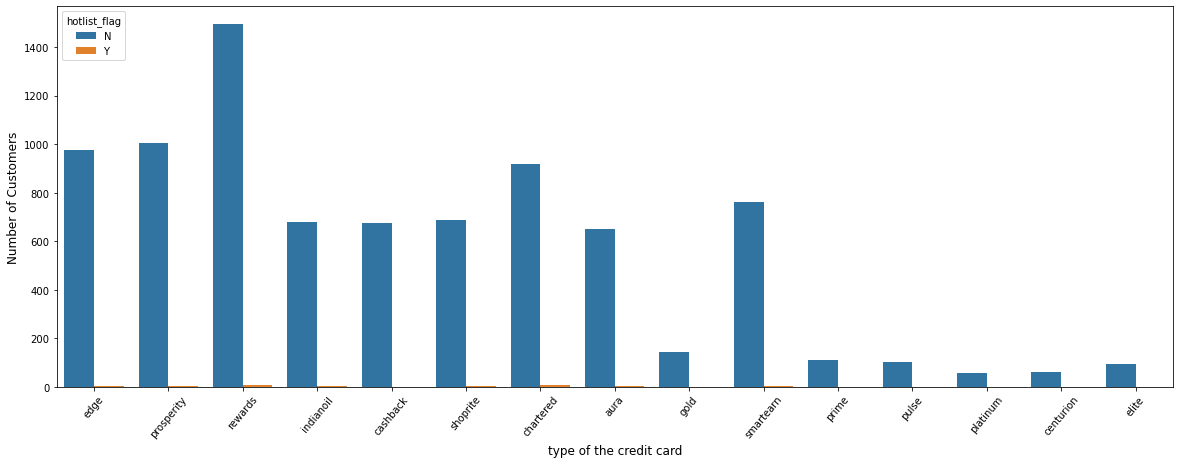

In [11]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='hotlist_flag')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

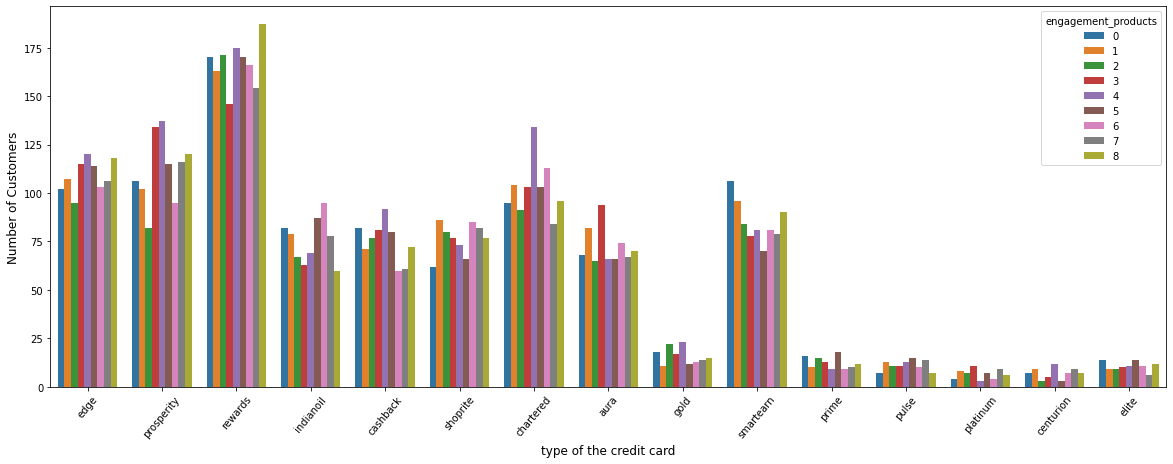

In [145]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='engagement_products')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

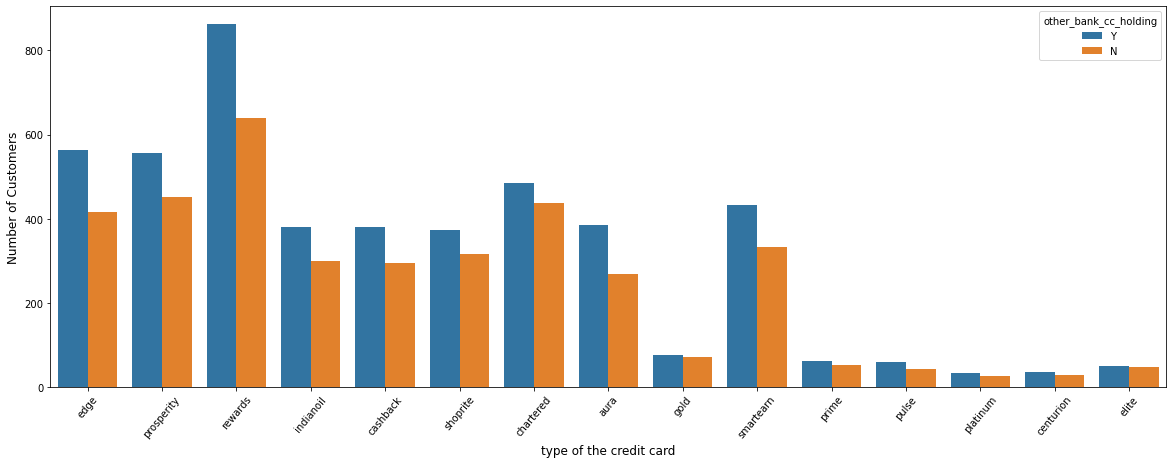

In [147]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type',hue='other_bank_cc_holding')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

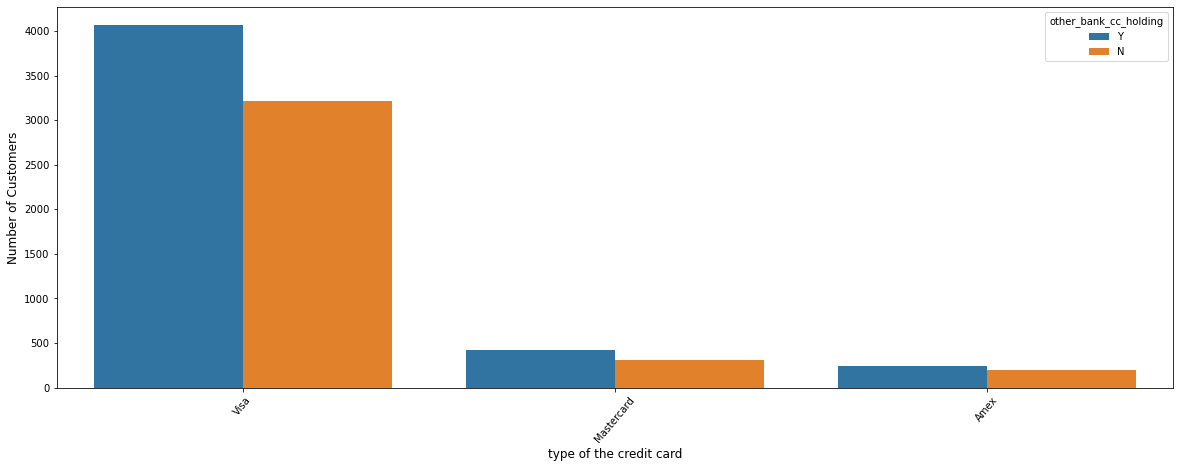

In [148]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='Issuer',hue='other_bank_cc_holding')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

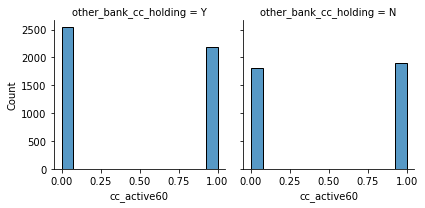

In [149]:
g = sns.FacetGrid(df1, col="other_bank_cc_holding")
g.map(sns.histplot, "cc_active60");

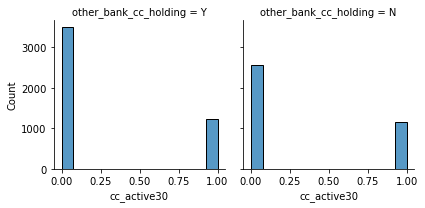

In [150]:
g = sns.FacetGrid(df1, col="other_bank_cc_holding")
g.map(sns.histplot, "cc_active30");

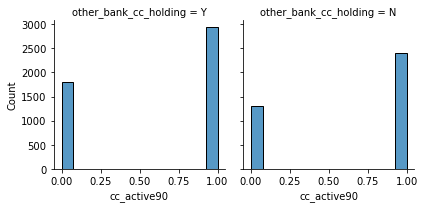

In [151]:
g = sns.FacetGrid(df1, col="other_bank_cc_holding")
g.map(sns.histplot, "cc_active90");

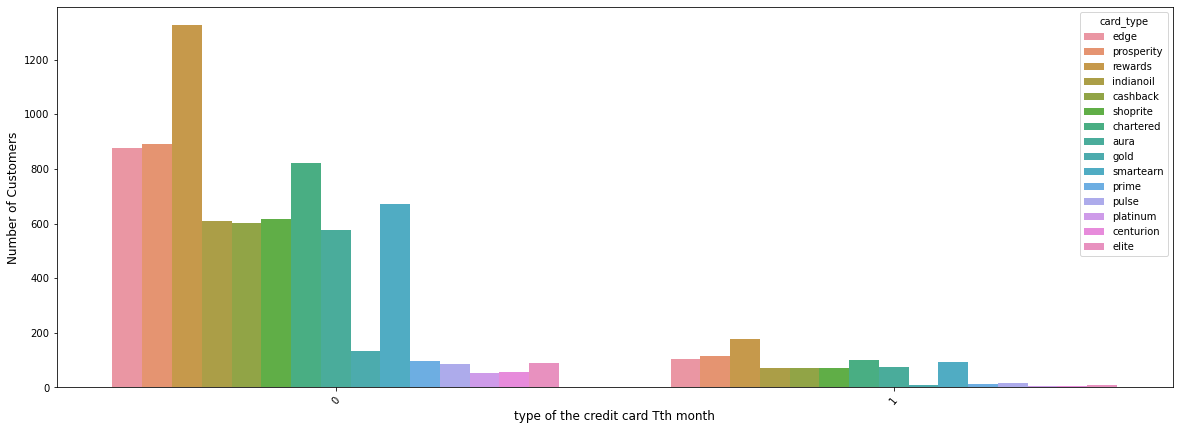

In [72]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='T+1_month_activity', hue='card_type')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card Tth month",fontsize = 12)
plt.xticks(rotation=50)
plt.show()


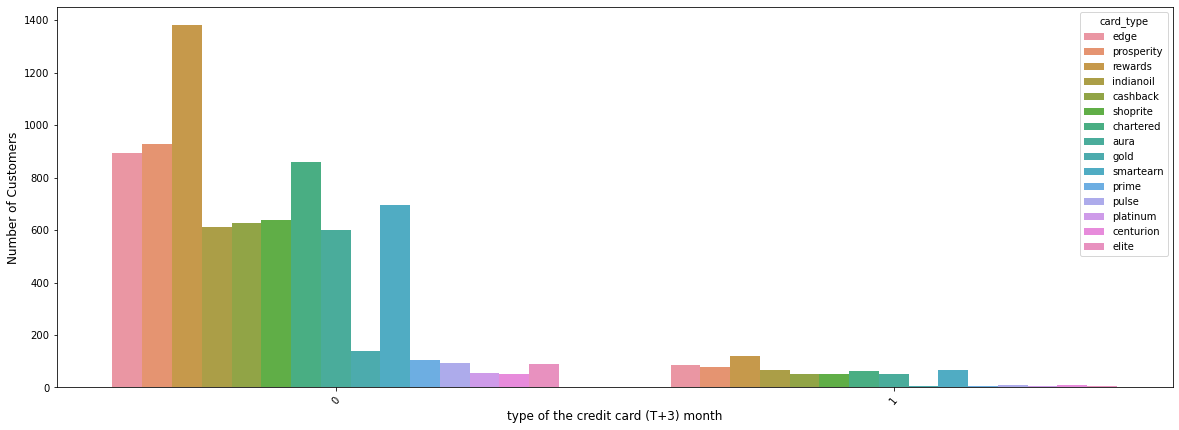

In [15]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='T+3_month_activity', hue='card_type')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card (T+3) month",fontsize = 12)
plt.xticks(rotation=50)
plt.show()


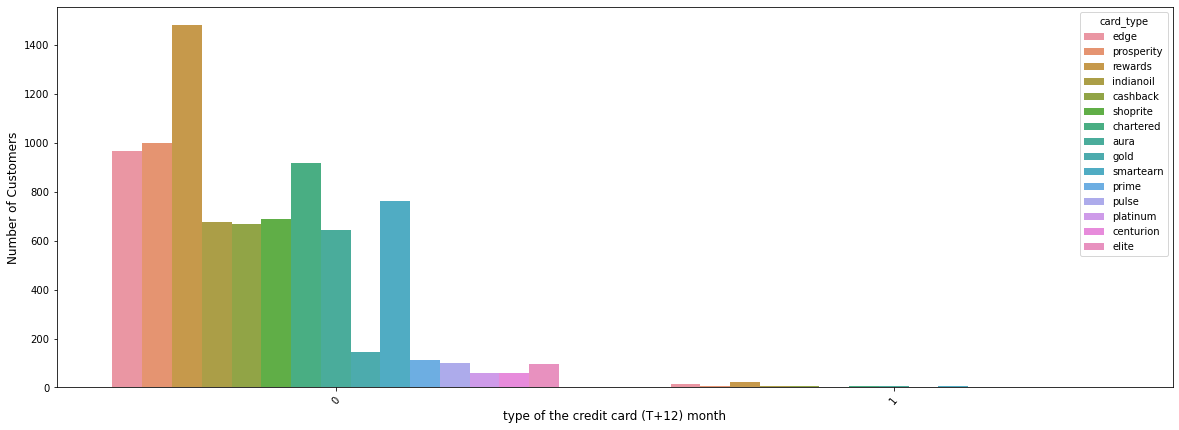

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='T+12_month_activity', hue='card_type')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card (T+12) month",fontsize = 12)
plt.xticks(rotation=50)
plt.show()


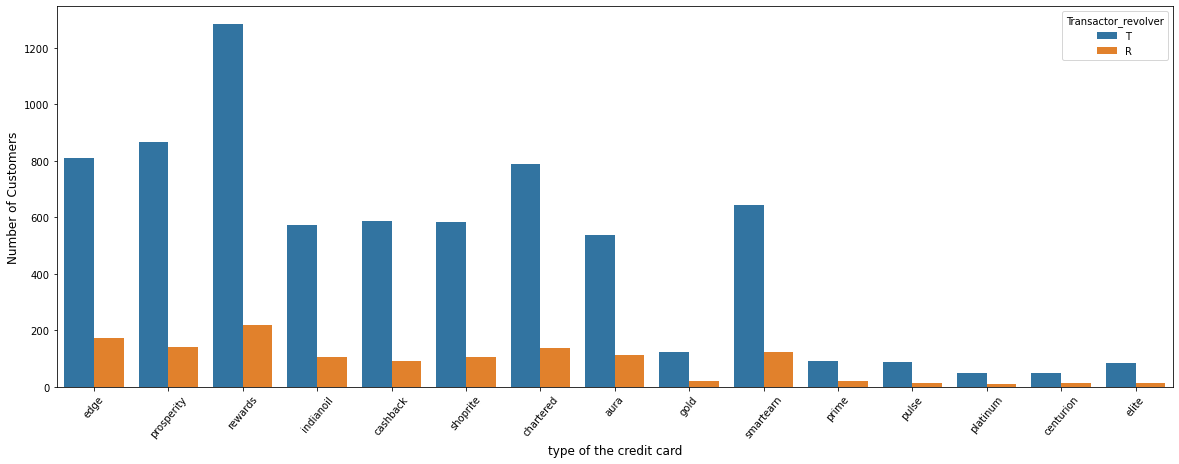

In [195]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type', hue='Transactor_revolver')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("type of the credit card",fontsize = 12)
plt.xticks(rotation=50)
plt.show()


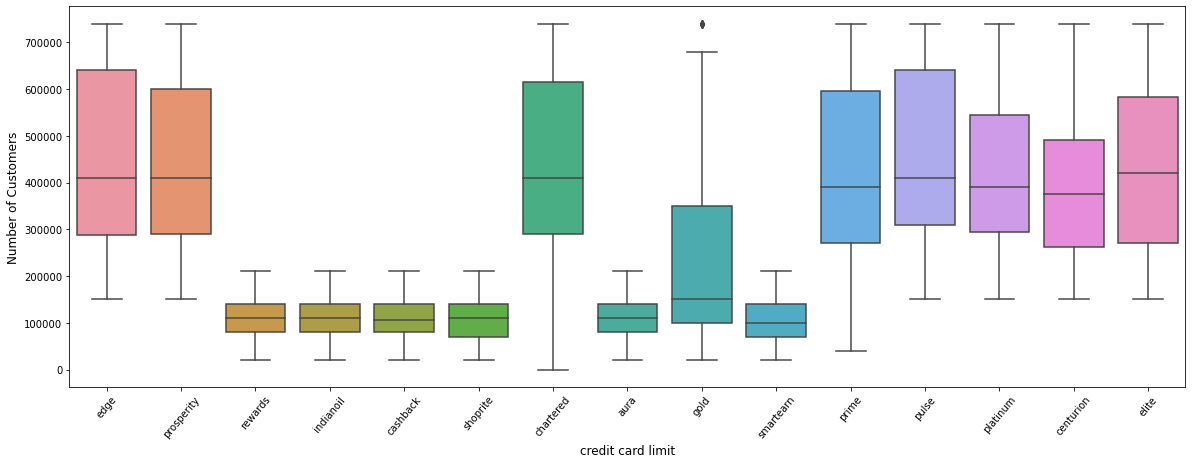

In [230]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df1, x='card_type', y='cc_limit');
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("credit card limit",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

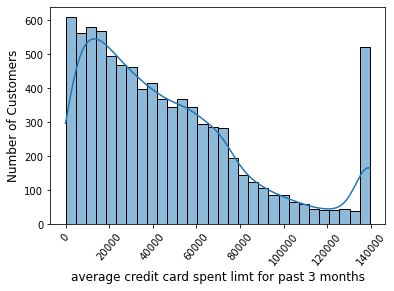

In [50]:
sns.histplot(data=df1, x='avg_spends_l3m', kde=True);
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("average credit card spent limt for past 3 months",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

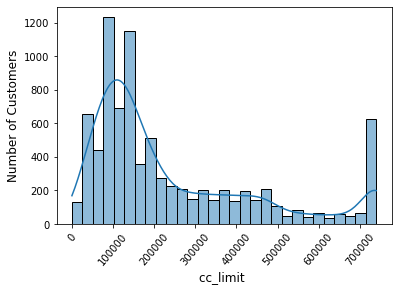

In [70]:
sns.histplot(data=df1, x='cc_limit', kde=True);
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("cc_limit ",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

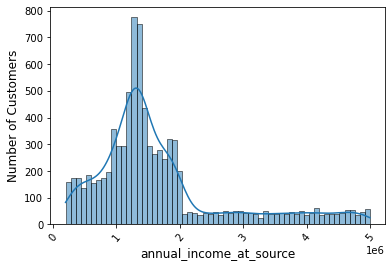

In [49]:
sns.histplot(data=df1, x='annual_income_at_source', kde=True);
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("annual_income_at_source",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

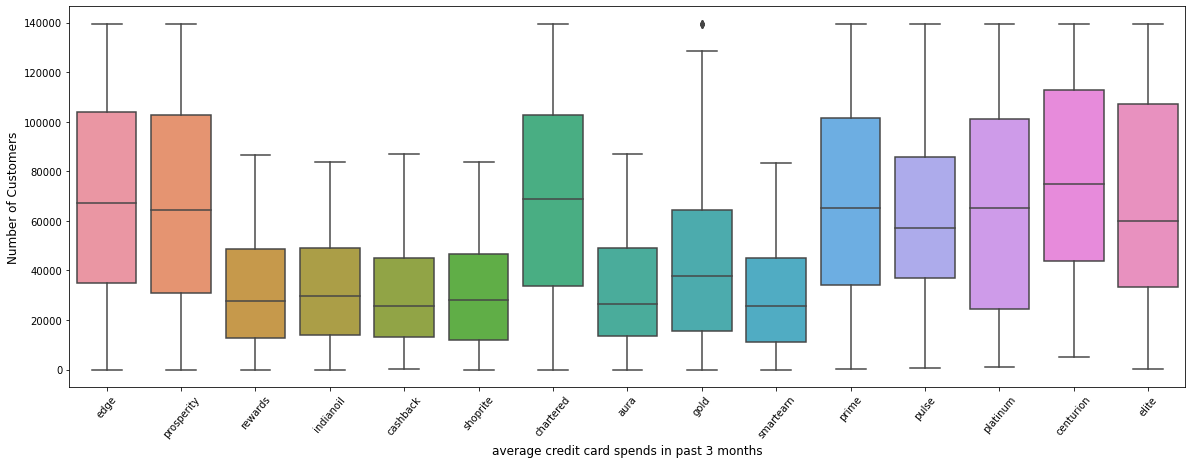

In [46]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df1, x='card_type', y='avg_spends_l3m');
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("average credit card spends in past 3 months",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

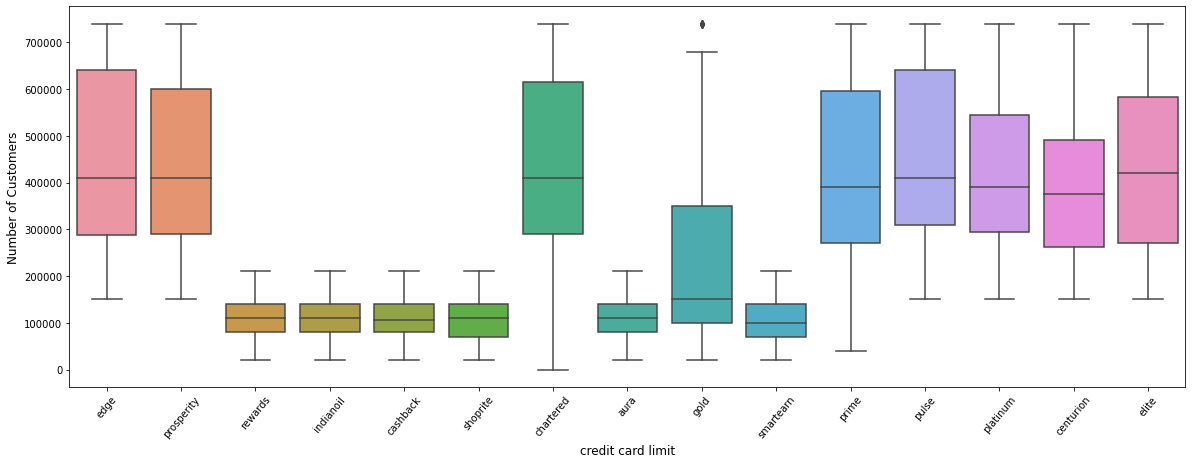

In [120]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df1, x='card_type', y='cc_limit');
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("credit card limit",fontsize = 12)
plt.xticks(rotation=50)
plt.show()

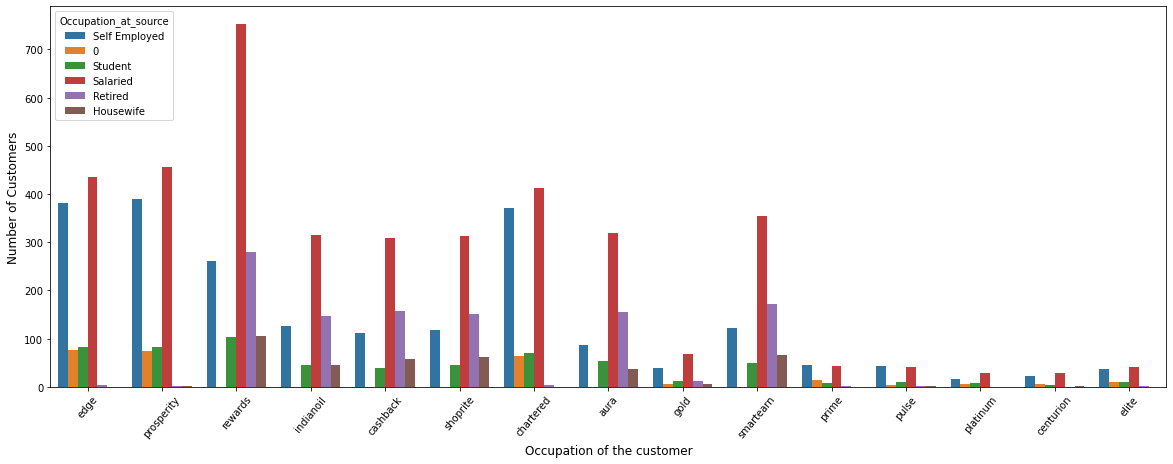

In [53]:
plt.figure(figsize=(20,7))
sns.countplot(data=df1, x='card_type', hue='Occupation_at_source')
plt.ylabel("Number of Customers",fontsize = 12)
plt.xlabel("Occupation of the customer",fontsize = 12)
plt.xticks(rotation=50)
plt.show()